# Implementation 1

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Importing the dataset

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['label'] = cancer['target']
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
X_train.shape

(398, 30)

## Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

## LDA tunning

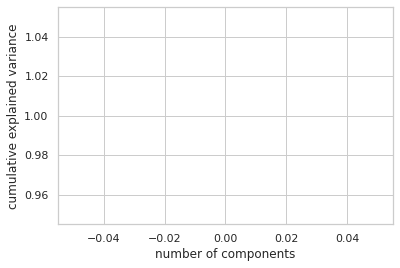

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,1.0,1.0


In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_test = LDA(n_components=None)
lda_test.fit(X_train, y_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(lda_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

evr = lda_test.explained_variance_ratio_
cvr = np.cumsum(lda_test.explained_variance_ratio_)

lda_df = pd.DataFrame()
lda_df['Cumulative Variance Ratio'] = cvr
lda_df['Explained Variance Ratio'] = evr
display(lda_df.head(15))

## LDA tunned

In [8]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [9]:
X_train.shape

(398, 1)

## SVC hyperparameter tuning

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [ 0.1, 1, 10, 100, 1000], 
     'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100, 1000],
     'kernel': ['linear']},
]
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             verbose=2)

## Predicting using the test set

In [11]:
y_pred = grid.predict(X_test)

## Evaluating

In [12]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred), 4))
print('Recall:', np.round(metrics.recall_score(y_test, y_pred), 4))
print('F1-Score:', np.round(metrics.f1_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[ 53   4]
 [  2 112]]
Accuracy: 0.9649
Precision: 0.9655
Recall: 0.9825
F1-Score: 0.9739
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        57
           1       0.97      0.98      0.97       114

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Implementation 2

## Importing the dataset

In [14]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

FileNotFoundError: ignored

In [ ]:
dataset.head()

## Splitting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Feature scaling

In [ ]:
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [ ]:
X_train.shape

## LDA Tunning

In [ ]:
lda_test = LDA(n_components=None)
lda_test.fit(X_train, y_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(lda_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

evr = lda_test.explained_variance_ratio_
cvr = np.cumsum(lda_test.explained_variance_ratio_)

lda_df = pd.DataFrame()
lda_df['Cumulative Variance Ratio'] = cvr
lda_df['Explained Variance Ratio'] = evr
display(lda_df.head(15))

## LDA Tunned

In [ ]:
lda = LDA(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
X_train.shape

## SVC hyperparameter tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [ 0.1, 1, 10, 100, 1000], 
     'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100, 1000],
     'kernel': ['linear']},
]
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)
classifier = grid

## Predicting using the test set

In [ ]:
y_pred = grid.predict(X_test)

## Evaluating

In [ ]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

## Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()